<a href="https://colab.research.google.com/github/Nayan2411/open-data/blob/master/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning: An introduction through image processing
## Handwritten digit recognition

In this first workshop, we're going to train our first Neural Network using Tensorflow and Keras.

The problem we're going to solve is the automatic recognition of handwritten digits. Which means that we are going to create a neural network which takes as input a picture, and compute as output a number between 0 and 9.

## Setup

In this first block of code, we're importing the libraries and the required files for the workshop. Some of those libraries are fairly technical, others are core librairies that we are going to use to train the neural network.

In [4]:
# This is where we import Tensorflow, and the library developed on top of it to easily train neural networks, Keras.
from tensorflow import keras
import numpy as np
# Import of some specific module which will allow us to directly load datasets for training
from tensorflow.keras.datasets import mnist
# Import specific functions to create models of neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

# Those libraries are only required for the drawing GUI we're going to use to manually give some input to our neural network.
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

# OpenCV2 library used to manipulate images
import cv2
# This import will allow us to display and plot our data
import matplotlib.pyplot as plt

# Download a trained demo neural network.
!wget -O digit.h5 https://transfer.sh/eGjwRt/digit3.h5

--2022-03-10 08:54:22--  https://transfer.sh/eGjwRt/digit3.h5
Resolving transfer.sh (transfer.sh)... 144.76.136.153, 2a01:4f8:200:1097::2
Connecting to transfer.sh (transfer.sh)|144.76.136.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3060736 (2.9M) [application/x-hdf]
Saving to: ‘digit.h5’

digit.h5            100%[===================>]   2.92M  4.63MB/s    in 0.6s    

2022-03-10 08:54:24 (4.63 MB/s) - ‘digit.h5’ saved [3060736/3060736]



The next block of code is not related to neural networks. It's a specific technical block of code which will allow to display below a drawing area for manually generating handwritten digits.

In [5]:
canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas><br/>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
ctx.lineCap = 'round';
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def drawAndGuess(model, filename='drawing.png', w=280, h=280, line_width=20):
  print("Draw a digit and then click on finish to try to recognize it.")
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  image = np.zeros((1,28,28));
  
  with open(filename, 'wb') as f:
    f.write(binary)
  image[0,:,:] = (cv2.resize(cv2.imread(filename, cv2.IMREAD_UNCHANGED), (28, 28))[:,:,3]) / 255
  result = model.predict(image)
  digit = np.argmax(result[0])
  confidence = np.round(result[0][digit] * 100)
  print(f"This is a {digit} with confidence {confidence}%.")

## Demo

Now let's load the demo neural network that has been already trained and see how it behaves.

In [6]:
# With this command we load the model that has been downloaded just before, and which is contained in the digit.h5 file.
demo_model = keras.models.load_model('digit.h5')
# Then we run the little snippet to let the ser input manually some handwritten digits.
drawAndGuess(demo_model)

Draw a digit and then click on finish to try to recognize it.


KeyboardInterrupt: ignored

## Load datasets

In order to train a neural network, we need some data. Fortunately, there is an available dataset of handwritten digits in tensorflow: the MNIST dataset.

The X variables contain the pictures of the handwritten digits. The Y variable contain the corresponding label - from 0 to 9 - for each picture.

In [7]:
# This command loads the data into local variable X_train_raw, Y_train_raw, X_test_raw, Y_test_raw
# The X_train and Y_train data will be used for training, and X_test and Y_test for validation of our models.
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = mnist.load_data()

### Question 1: How many data have we loaded for training and validation? What is the structure of this data? And what are the values contained in the data?

Hint: the variables X_train_raw, Y_train_raw, X_test_raw and Y_test_raw which have been set in the previous code block are Numpy arrays. See https://numpy.org/devdocs/reference/routines.array-manipulation.html .

In [ ]:
### START CODE HERE
print(X_train_raw.shape)
print(Y_train_raw.shape)
print(X_test_raw.shape)
print(Y_test_raw.shape)
print(X_train_raw[0,:,:])
print(Y_train_raw[0:10])

### END CODE HERE

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0 

Next block of code is technical, and is about reshaping the labels and normalizing the inputs.

In [8]:
Y_train = keras.utils.to_categorical(Y_train_raw, 10)
Y_test = keras.utils.to_categorical(Y_test_raw, 10)
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0:10, :])

X_train_raw = X_train_raw.astype('float32')
X_test_raw = X_test_raw.astype('float32')

X_train = X_train_raw / 255
X_test = X_test_raw / 255

(60000, 10)
(10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


##Exercise 2: Visualize your data

Input data are grayscale images 28px by 28px. Write a function that allow to visualize any input value in the data set, and its classification. Use the **matplotlib** library that we have imported at the beginning of the workbook.

This is a 2


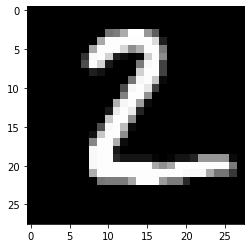

In [9]:
# This method should display the picture at index i in the dataset X, and also print the corresponding label in Y
def visualize(X, Y, i):
  ### START CODE HERE
  plt.imshow(X[i,:,:], cmap='gray', vmin=0, vmax=1)
  print(f"This is a {np.argmax(Y[i])}")
  ### END CODE HERE

visualize(X_test, Y_test, 1)

## First training

Now is time to train our first neural network. Let's execute the piece of code below and then we'll analyse each step in it.

In [ ]:
# Create a sequential model
model = Sequential()
# Flatten the input data, from a 28x28 array to a one dimensional array of 28x28=784
model.add(Flatten(input_shape=(28, 28)))
# Add a layer of 10 neurons, all connected to all neurons of the previous layer
# The 'softmax' activation is responsible for normalizing the output of the neurons.
model.add(Dense(10, activation='softmax'))

# We ask Keras and Tensorflow to compile the definition of the model into some
# optimized code that will allow to make the neural network to  evaluate input 
# images and also be trained
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Prints a summary of the model
model.summary()

# This is the command that will train the model with the training dataset, and also
# evaluate the model performance with the validation dataset.
history = model.fit(X_train, Y_train,
          batch_size=32,
          epochs=50,          
          validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4723 - accuracy: 0.8767 - val_loss: 0.3076 - val_accuracy: 0.9137
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9150 - val_loss: 0.2813 - val_accuracy: 0.9219
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.9213 - val_loss: 0.2728 - val_accuracy: 0.9237
Epoch 4/50
1875/18

KeyboardInterrupt: ignored

## Visualize training

Let's observe how the performance of the neural network has evolved through the training, thanks to the object 'history' returned by the fitting function.

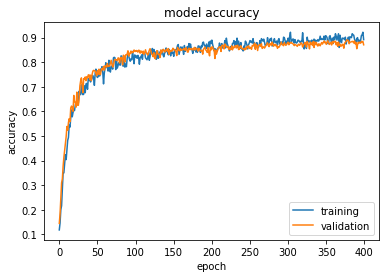

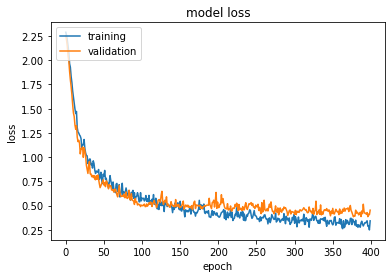

In [22]:
def visualize_training(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['training', 'validation'], loc='lower right')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['training', 'validation'], loc='upper left')
  plt.show()

visualize_training(history)

Now the model is trained, we can use the snippet that we introduced at the beginning of the notebook to see how it perform with manual inputs.

In [9]:
# We use the snippet declared at the top of the notebook, and we pass it the model of the neural network we just trained
drawAndGuess(model)

Draw a digit and then click on finish to try to recognize it.


AttributeError: ignored

The trained model can be used to try to identify handwritten digits. For this we just use the **predict** function of the model.

This is a 5


array([[6.00833264e-05, 1.45183507e-13, 1.18966277e-07, 1.68749771e-11,
        3.27106609e-05, 7.05597558e-05, 9.99828219e-01, 1.20109545e-17,
        8.26909945e-06, 6.26417160e-15]], dtype=float32)

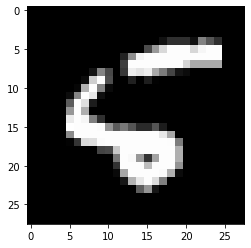

In [ ]:
visualize(X_test, Y_test, 8)
model.predict(X_test[8:9,:,:])

Let's write some handy functions to visualize our model predictions and for which inputs it failed.

In [21]:
def visualize_and_predict(X, Y, index):
  plt.imshow(X[index,:,:], cmap='gray', vmin=0, vmax=1)
  plt.show()
  y = model.predict(X[index:(index+1),:,:])
  print(f"This is a {np.argmax(Y[index])}. The model predicted {np.argmax(y)}.")
  print(f"Predictions probabilites were:")
  for i in range(0,10):
    print(f"{i}: {np.round(y[0, i] * 100)} %")

def indexes_bad_prediction(X, Y):
  result = []
  Y_pred = model.predict(X)
  for i in range(0,10000):
    if np.argmax(Y[i]) != np.argmax(Y_pred[i]):
      result.append(i)
  return result

print(indexes_bad_prediction(X_test, Y_test))

[6, 20, 21, 22, 24, 48, 62, 66, 73, 76, 84, 112, 119, 121, 128, 151, 160, 164, 166, 169, 185, 198, 213, 217, 227, 232, 233, 241, 242, 247, 250, 259, 264, 268, 277, 290, 295, 299, 301, 303, 304, 316, 317, 320, 321, 326, 338, 341, 344, 349, 362, 373, 376, 381, 386, 391, 394, 401, 403, 406, 412, 431, 435, 436, 439, 443, 444, 445, 448, 456, 457, 464, 465, 479, 483, 484, 486, 495, 497, 507, 508, 511, 515, 519, 528, 531, 532, 542, 553, 565, 571, 572, 577, 578, 582, 588, 589, 591, 596, 597, 606, 613, 614, 619, 628, 630, 641, 646, 650, 659, 661, 668, 683, 684, 688, 691, 699, 707, 708, 717, 728, 734, 740, 741, 748, 752, 757, 760, 774, 786, 787, 795, 804, 810, 823, 830, 833, 838, 846, 864, 870, 872, 877, 878, 879, 881, 882, 890, 893, 902, 915, 924, 926, 931, 936, 937, 939, 947, 951, 956, 958, 959, 960, 965, 975, 998, 1000, 1014, 1015, 1018, 1022, 1026, 1033, 1045, 1052, 1056, 1062, 1074, 1077, 1081, 1092, 1101, 1107, 1112, 1124, 1125, 1142, 1149, 1152, 1153, 1156, 1164, 1166, 1181, 1182, 1185, 1

## Exercise 3: Inspect bad predictions

Display the first handwritten digits that was badly predicted by the model. Can you give an explanation why the model gave a bad predicition?

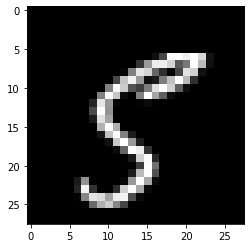

This is a 5. The model predicted 7.
Predictions probabilites were:
0: 1.0 %
1: 0.0 %
2: 0.0 %
3: 1.0 %
4: 0.0 %
5: 37.0 %
6: 0.0 %
7: 52.0 %
8: 3.0 %
9: 5.0 %


In [ ]:
### START COdE HERE

visualize_and_predict(X_test, Y_test, 211)

### END CODE HERE

## A more complex neural network

From the simplest neural network that we have trained, composed of only an input layer and an output layer, we're going to introduce an intermediate layer (hidden layer).

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

history = model.fit(X_train, Y_train,
          batch_size=32,
          epochs=50,          
          validation_data=(X_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5005 - accuracy: 0.8565 - val_loss: 0.2920 - val_accuracy: 0.9197
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2850 - accuracy: 0.9179 - val_loss: 0.2680 - val_accuracy: 0.9241
Epoch 3/50
1875/1875 [====

## Exercise 4: Evaluate the new model

Dsiplay graphs to understand how the training of the model has evolved. Try the new model against some manual inputs and against inputs from the validation dataset.

In [20]:
### START CODE HERE
visualize_training(history)

def visualize_and_predict(X, Y, index):
  plt.imshow(X[index,:,:], cmap='gray', vmin=0, vmax=1)
  plt.show()
  y = model.predict(X[index:(index+1),:,:])
  print(f"This is a {np.argmax(Y[index])}. The model predicted {np.argmax(y)}.")
  print(f"Predictions probabilites were:")
  for i in range(0,10):
    print(f"{i}: {np.round(y[0, i] * 100)} %")

def indexes_bad_prediction(X, Y):
  result = []
  Y_pred = model.predict(X)
  for i in range(0,10000):
    if np.argmax(Y[i]) != np.argmax(Y_pred[i]):
      result.append(i)
  return result

print(indexes_bad_prediction(X_test, Y_test))

visualize_and_predict(X_test,Y_test,66)

### END CODE HERE

NameError: ignored

##Exercise 5: Do your best to find the more accurate neural network

Try to modify your network designs (number of neurons, number of layers) and hyperparameters (batch size, number of epochs, etc...) and find the best model, ie the one with the best validation accuracy.

What is the best accuracy that you can achieve?

What happens if you try to use a lot of layers and hundreds or thousands of neurons in the model (accuracy, learning curve, training time, etc)?

In [38]:
### START CODE HERE

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

history = model.fit(X_train, Y_train,
          batch_size=32,
          epochs=50,          
          validation_data=(X_test, Y_test))

### END CODE HERE

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 300)               235500    
                                                                 
 dense_25 (Dense)            (None, 200)               60200     
                                                                 
 dense_26 (Dense)            (None, 100)               20100     
                                                                 
 dense_27 (Dense)            (None, 50)                5050      
                                                                 
 dense_28 (Dense)            (None, 10)                510       
                                                                 
Total params: 321,360
Trainable params: 321,360
Non-tr

KeyboardInterrupt: ignored

In [57]:
drawAndGuess(model)

Draw a digit and then click on finish to try to recognize it.


This is a 9 with confidence 96.0%.


#Exercise 6: What if we had only very few data?

The digit recognition works pretty well because we had a lot of training samples (60000). What if we only had 1000 or even less? Try to train a neural network with less and less data. The structure of the neural network must be:

- input layer
- 50 neurons densely connected to the previous layer
- 50 neurons densely connected to the previous layer
- 50 neurons densely connected to the previous layer
- 10 neurons densely connected to the previous layer

In [14]:
set_sizes = [60000, 30000, 15000, 7500, 3500, 2000, 1000, 500, 250, 100]
accuracies = []


for set_size in set_sizes:
  print(f"Starting training with train set size {set_size}...")
  X_train_slice = X_train[0:set_size,:,:]
  Y_train_slice = Y_train[0:set_size,:]
  X_test_slice = X_test[0:set_size,:,:]
  Y_test_slice = Y_test[0:set_size,:]
  ## As the set of the dataset decreases, we have to increase the number of epochs 
  number_of_epochs = round(300000 / set_size)
  ### START CODE HERE
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train_slice, Y_train_slice,
          batch_size=32,
          epochs= number_of_epochs,          
          validation_data=(X_test_slice, Y_test_slice))
accuracy = max(history.history['val_accuracy'])
  ### END CODE HERE
print(f"Accuracy is {accuracy}.")
accuracies.append(accuracy)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 19ms/step - loss: 4.8089e-05 - accuracy: 1.0000 - val_loss: 1.4258 - val_accuracy: 0.6700
Epoch 502/3000
4/4 [==============================] - 0s 15ms/step - loss: 4.7871e-05 - accuracy: 1.0000 - val_loss: 1.4257 - val_accuracy: 0.6700
Epoch 503/3000
4/4 [==============================] - 0s 15ms/step - loss: 4.7638e-05 - accuracy: 1.0000 - val_loss: 1.4257 - val_accuracy: 0.6700
Epoch 504/3000
4/4 [==============================] - 0s 15ms/step - loss: 4.7417e-05 - accuracy: 1.0000 - val_loss: 1.4257 - val_accuracy: 0.6700
Epoch 505/3000
4/4 [==============================] - 0s 15ms/step - loss: 4.7199e-05 - accuracy: 1.0000 - val_loss: 1.4256 - val_accuracy: 0.6700
Epoch 506/3000
4/4 [==============================] - 0s 16ms/step - loss: 4.6967e-05 - accuracy: 1.0000 - val_loss: 1.4256 - val_accuracy: 0.6700
Epoch 507/3000
4/4 [==============================] - 0s 15ms/step - loss: 4.6730e

Now we visualize how the training of the model behaves depending on the size of the training set.

ValueError: ignored

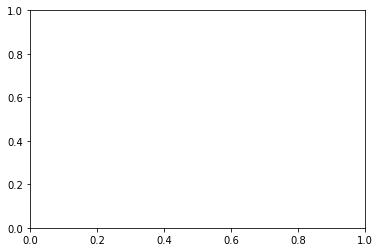

In [18]:
plt.plot(set_sizes, accuracies)
plt.show()
print(set_sizes)
print(accuracies)

##Data augmentation

When a dataset is too small, we can use some technique to artificially increase the size of the dataset, and thus the efficiency of the training.

When dealing with images, it is generally possible to apply some geometric transformations to an image without modifying its meaning. This principle can then be used to augment the training dataset.

Epoch 1/400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


15/15 [==============================] - 3s 125ms/step - loss: 2.2936 - accuracy: 0.1380 - val_loss: 2.2853 - val_accuracy: 0.1688
Epoch 2/400
15/15 [==============================] - 2s 116ms/step - loss: 2.2602 - accuracy: 0.2020 - val_loss: 2.2351 - val_accuracy: 0.2337
Epoch 3/400
15/15 [==============================] - 1s 82ms/step - loss: 2.2012 - accuracy: 0.2320 - val_loss: 2.1672 - val_accuracy: 0.2767
Epoch 4/400
15/15 [==============================] - 2s 109ms/step - loss: 2.1309 - accuracy: 0.2880 - val_loss: 2.0817 - val_accuracy: 0.3030
Epoch 5/400
15/15 [==============================] - 2s 110ms/step - loss: 2.0605 - accuracy: 0.3240 - val_loss: 1.9989 - val_accuracy: 0.3130
Epoch 6/400
15/15 [==============================] - 1s 65ms/step - loss: 2.0083 - accuracy: 0.3160 - val_loss: 1.8723 - val_accuracy: 0.3565
Epoch 7/400
15/15 [==============================] - 1s 50ms/step - loss: 1.9222 - accuracy: 0.3480 - val_loss: 1.7916 - val_accuracy: 0.3995
Epoch 8/400
15

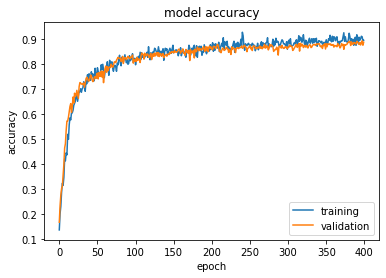

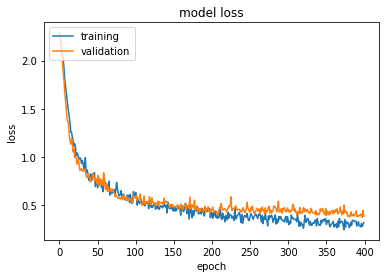

In [23]:
# Take only the first 500 samples of the training dataset
X_train_small = X_train[0:500, :, :].reshape((500,28,28,1))
Y_train_small = Y_train[0:500, :]

# The ImageDataGenerator will randomly apply some transformation to the input images before passing them to the neural network
generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range = 0.1, shear_range = 10)

# Define the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
history = model.fit_generator(generator=generator.flow(X_train_small, Y_train_small, batch_size=32), steps_per_epoch = 500 / 32, epochs=400, validation_data = (X_test,Y_test))

# Visualize the training evolution
visualize_training(history)

##Understand how your neural network performs

To understand better how your neural network behaves and actually "do" to recognize a digit, we can try to hide some part of the image and observe the accuracy of the neural network.

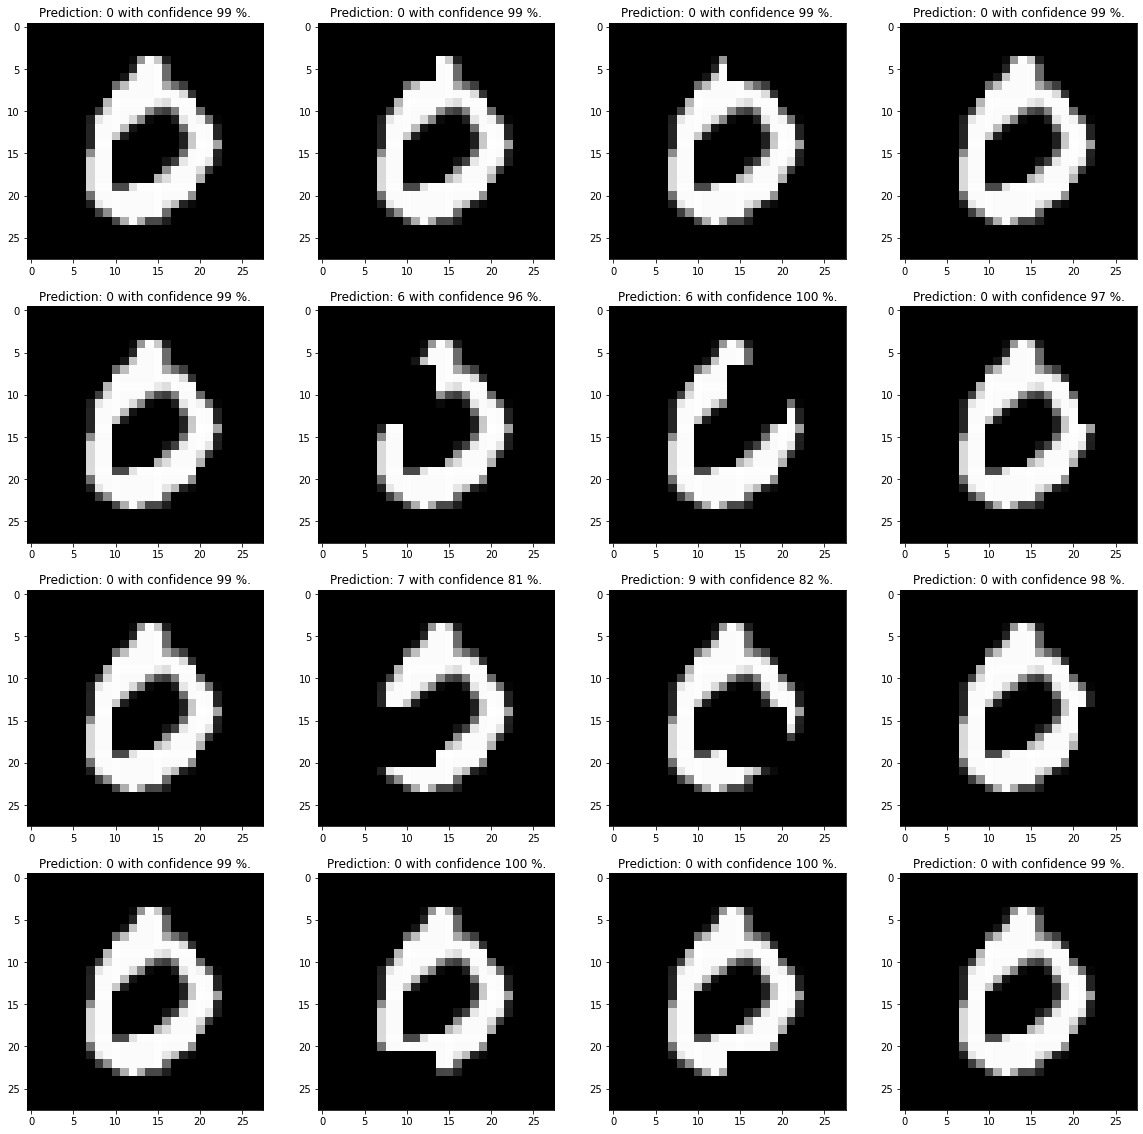

In [27]:
# For a given handwritten digit input, hides a part of the image and make the model predict the result on the partially hidden image.
def compute_hidden_pictures(picture):
  fig, axs = plt.subplots(4, 4, figsize=(20,20))
  for i in range(0,4):
    for j in range(0,4):
      picture_masked = np.zeros((28,28))
      picture_masked[:,:] = picture[:,:]
      picture_masked[(7*i):(7*(i+1)), (7*j):((7*(j+1)))] = 0
      predictions = model.predict(picture_masked.reshape((1,28,28)))[0,:]
      prediction = np.argmax(predictions)
      confidence = predictions[prediction]
      axs[i, j].set_title(f"Prediction: {prediction} with confidence {round(confidence * 100)} %.")
      axs[i, j].imshow(picture_masked, cmap='gray', vmin=0, vmax=1)

compute_hidden_pictures(X_test[3,:,:])

#Exercise 7: Use hidden images to train your neural network

Hidding a small part of an image of a handwritten digit doesn't change its meaning. Then we can use this fact to increase the robustness of our neural network.

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


250/250 [==============================] - 5s 17ms/step - loss: 1.8410 - accuracy: 0.3647 - val_loss: 1.3191 - val_accuracy: 0.5889
Epoch 2/100
250/250 [==============================] - 4s 16ms/step - loss: 1.2305 - accuracy: 0.5905 - val_loss: 0.9111 - val_accuracy: 0.7040
Epoch 3/100
250/250 [==============================] - 4s 16ms/step - loss: 1.0288 - accuracy: 0.6622 - val_loss: 0.7838 - val_accuracy: 0.7406
Epoch 4/100
250/250 [==============================] - 4s 15ms/step - loss: 0.9110 - accuracy: 0.6988 - val_loss: 0.6288 - val_accuracy: 0.8001
Epoch 5/100
250/250 [==============================] - 4s 16ms/step - loss: 0.8452 - accuracy: 0.7285 - val_loss: 0.5500 - val_accuracy: 0.8211
Epoch 6/100
250/250 [==============================] - 4s 16ms/step - loss: 0.7958 - accuracy: 0.7361 - val_loss: 0.5133 - val_accuracy: 0.8310
Epoch 7/100
250/250 [==============================] - 4s 16ms/step - loss: 0.7354 - accuracy: 0.7592 - val_loss: 0.4926 - val_accuracy: 0.8421
Epoc

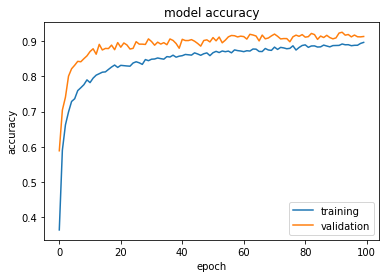

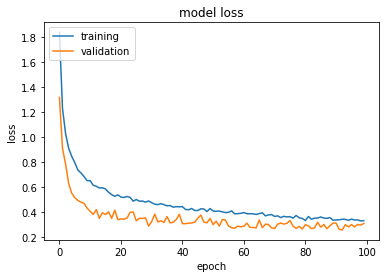

In [32]:
# Generates a dataset of 8000 samples, by using the first 500 samples of the initial dataset, and hiding partially a different area of the picture.
X_train_hidden = np.zeros((8000,28,28,1))
Y_train_hidden = np.zeros((8000,10))
for i in range(0,4):
    for j in range(0,4):
      k = i + 4*j
      X_train_hidden[(500*k):(500*(k+1)),:,:,0] = X_train[0:500,:,:]
      X_train_hidden[(500*k):(500*(k+1)),(7*i):(7*(i+1)), (7*j):((7*(j+1))),0] = 0
      Y_train_hidden[(500*k):(500*(k+1)),:] = Y_train[0:500,:]


### START CODE HERE
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
history = model.fit_generator(generator=generator.flow(X_train_hidden, Y_train_hidden, batch_size=32), steps_per_epoch = 8000 / 32, epochs=100, validation_data = (X_test,Y_test))

# Visualize the training evolution
visualize_training(history)


### END CODE HERE